In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy as citipy
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Starting/Base URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | wajima
Processing Record 5 of Set 1 | abu zabad
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | novoagansk
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | yugorsk
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | minatitlan
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | quatre cocos
Processing Record 22

Processing Record 39 of Set 4 | gobabis
Processing Record 40 of Set 4 | nabire
Processing Record 41 of Set 4 | koslan
Processing Record 42 of Set 4 | pizarro
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | curuca
Processing Record 45 of Set 4 | acari
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | ambon
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | jujuy
City not found. Skipping...
Processing Record 50 of Set 4 | maragogi
Processing Record 1 of Set 5 | roswell
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | pahrump
Processing Record 7 of Set 5 | burnie
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | changji
Processing Record 10 of Set 5 | zaragoza
Processing Record 11 of Set 5 | mwene-ditu
Processing Record 12 of Set 5 | tautira
Processing Record 1

Processing Record 29 of Set 8 | kisangani
Processing Record 30 of Set 8 | turbat
Processing Record 31 of Set 8 | djambala
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | yantal
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | bargal
City not found. Skipping...
Processing Record 37 of Set 8 | cayenne
Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | great yarmouth
Processing Record 40 of Set 8 | nguruka
Processing Record 41 of Set 8 | tezu
Processing Record 42 of Set 8 | vilhena
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | singkang
Processing Record 45 of Set 8 | baruun-urt
Processing Record 46 of Set 8 | mosquera
Processing Record 47 of Set 8 | nova venecia
Processing Record 48 of Set 8 | san sebastian
Processing Record 49 of Set 8 | mirabad
Processing Record 50 of Set 8 | qasigiannguit
Processing Record 1 of Set 9 | tucupita
Processing Record 2 o

Processing Record 16 of Set 12 | biltine
Processing Record 17 of Set 12 | rakhya
City not found. Skipping...
Processing Record 18 of Set 12 | saurimo
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | paradwip
City not found. Skipping...
Processing Record 21 of Set 12 | muisne
Processing Record 22 of Set 12 | moranbah
Processing Record 23 of Set 12 | yomitan
City not found. Skipping...
Processing Record 24 of Set 12 | port blair
Processing Record 25 of Set 12 | dawei
Processing Record 26 of Set 12 | turukhansk
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | burica
City not found. Skipping...
Processing Record 29 of Set 12 | sorland
Processing Record 30 of Set 12 | levelland
Processing Record 31 of Set 12 | taganak
Processing Record 32 of Set 12 | acapetahua
Processing Record 33 of Set 12 | machilipatnam
Processing Record 34 of Set 12 | denia
Processing Record 35 of Set 12 | okha
Processing Record 36 of Set 12 | uyuni
Processing Re

In [8]:
# Tally number of cities in city_data
len(city_data)

567

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-38.88,99,64,1.81,RU,2022-02-02 11:56:37
1,Bubaque,11.2833,-15.8333,78.31,76,11,10.25,GW,2022-02-02 11:56:38
2,Wajima,37.4000,136.9000,38.93,74,96,7.61,JP,2022-02-02 11:56:38
3,Abu Zabad,12.3500,29.2500,88.30,12,8,7.87,SD,2022-02-02 11:56:38
4,Richards Bay,-28.7830,32.0377,92.71,50,9,15.99,ZA,2022-02-02 11:56:39
5,Novoagansk,61.9449,76.6625,-5.91,100,53,5.86,RU,2022-02-02 11:56:39
6,Broome,42.2506,-75.8330,30.51,78,40,3.00,US,2022-02-02 11:56:39
7,Mataura,-46.1927,168.8643,62.47,100,100,1.39,NZ,2022-02-02 11:56:39
8,Hasaki,35.7333,140.8333,37.80,34,30,3.85,JP,2022-02-02 11:56:40
9,Yugorsk,61.3133,63.3319,21.83,96,100,5.82,RU,2022-02-02 11:56:40


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", 
                        "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-02-02 11:56:37,71.9667,102.5000,-38.88,99,64,1.81
1,Bubaque,GW,2022-02-02 11:56:38,11.2833,-15.8333,78.31,76,11,10.25
2,Wajima,JP,2022-02-02 11:56:38,37.4000,136.9000,38.93,74,96,7.61
3,Abu Zabad,SD,2022-02-02 11:56:38,12.3500,29.2500,88.30,12,8,7.87
4,Richards Bay,ZA,2022-02-02 11:56:39,-28.7830,32.0377,92.71,50,9,15.99
5,Novoagansk,RU,2022-02-02 11:56:39,61.9449,76.6625,-5.91,100,53,5.86
6,Broome,US,2022-02-02 11:56:39,42.2506,-75.8330,30.51,78,40,3.00
7,Mataura,NZ,2022-02-02 11:56:39,-46.1927,168.8643,62.47,100,100,1.39
8,Hasaki,JP,2022-02-02 11:56:40,35.7333,140.8333,37.80,34,30,3.85
9,Yugorsk,RU,2022-02-02 11:56:40,61.3133,63.3319,21.83,96,100,5.82


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Get today's date in seconds.
today_date = time.strftime("%x")
today_date

'02/02/22'

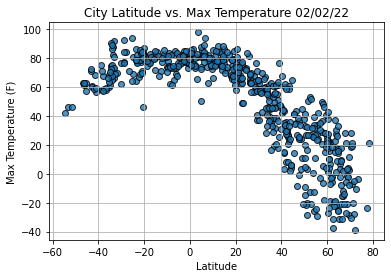

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ today_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1_lat_v_max_temp.png")

# Show plot.
plt.show()

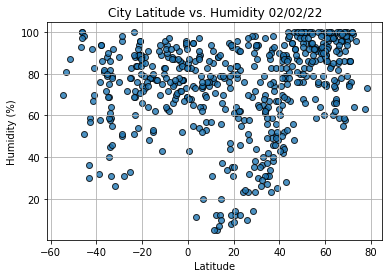

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ today_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2_lat_v_humidity.png")

# Show plot.
plt.show()

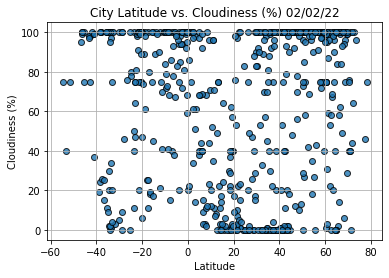

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ today_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig3_lat_v_cloudiness.png")

# Show plot.
plt.show()